# Import Libraries


In [1]:
# 1. to handle the data
import pandas as pd
import numpy as np
import os


# from imblearn.combine import SMOTEENN 


# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
import plotly.express as px
import shap


# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
# from sklearn.impute import SimpleImputer, KNNImputer

# 4. import pipeline and feature selection
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFromModel
# from sklearn.decomposition import PCA, TruncatedSVD



# 5. Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV 

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, RandomForestRegressor
from xgboost import XGBClassifier


# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,recall_score , f1_score, roc_auc_score


# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

# 9. For saving the model
import joblib


c:\Users\Lenovo\OneDrive\Desktop\Heart Failure Prediction\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the Dataset



In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Heart Failure Prediction\data\heart_failure_clinical_raw_data.csv')

In [3]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
122,60.000,0,96,1,38,0,228000.0,0.75,140,0,0,95,0
250,50.000,0,2522,0,30,1,404000.0,0.50,139,0,0,214,0
276,70.000,0,618,0,35,0,327000.0,1.10,142,0,0,245,0
116,60.000,1,96,1,60,1,271000.0,0.70,136,0,0,94,0
188,60.667,1,151,1,40,1,201000.0,1.00,136,0,0,172,0
74,69.000,0,582,0,20,0,266000.0,1.20,134,1,1,73,1
29,82.000,0,70,1,30,0,200000.0,1.20,132,1,1,26,1
97,70.000,1,59,0,60,0,255000.0,1.10,136,0,0,85,0
236,75.000,0,119,0,50,1,248000.0,1.10,148,1,0,209,0
86,55.000,0,47,0,35,1,173000.0,1.10,137,1,0,79,0


# Exploratory Data Analysis (EDA)

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [579]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [580]:
new_column_names = {
    'age': 'Age',
    'anaemia': 'Anaemia',
    'creatinine_phosphokinase': 'CreatininePhosphokinase',
    'diabetes': 'Diabetes',
    'ejection_fraction': 'EjectionFraction',
    'high_blood_pressure': 'HighBloodPressure',
    'platelets': 'PlateletCount',
    'serum_creatinine': 'SerumCreatinine',
    'serum_sodium': 'SerumSodium',
    'sex': 'Sex',
    'smoking': 'SmokingStatus',
    'time': 'FollowupDays',
    'DEATH_EVENT': 'DeathEvent'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)


In [581]:
df.columns

Index(['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes',
       'EjectionFraction', 'HighBloodPressure', 'PlateletCount',
       'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus',
       'FollowupDays', 'DeathEvent'],
      dtype='object')

In [582]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
CreatininePhosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
EjectionFraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
HighBloodPressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
PlateletCount,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
SerumCreatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
SerumSodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [583]:
df.shape

(299, 13)

In [584]:
df.isnull().sum()

Age                        0
Anaemia                    0
CreatininePhosphokinase    0
Diabetes                   0
EjectionFraction           0
HighBloodPressure          0
PlateletCount              0
SerumCreatinine            0
SerumSodium                0
Sex                        0
SmokingStatus              0
FollowupDays               0
DeathEvent                 0
dtype: int64

In [585]:
df.drop_duplicates(inplace=True)

In [586]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Anaemia'}>,
        <Axes: title={'center': 'CreatininePhosphokinase'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'EjectionFraction'}>,
        <Axes: title={'center': 'HighBloodPressure'}>,
        <Axes: title={'center': 'PlateletCount'}>,
        <Axes: title={'center': 'SerumCreatinine'}>],
       [<Axes: title={'center': 'SerumSodium'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'SmokingStatus'}>,
        <Axes: title={'center': 'FollowupDays'}>],
       [<Axes: title={'center': 'DeathEvent'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

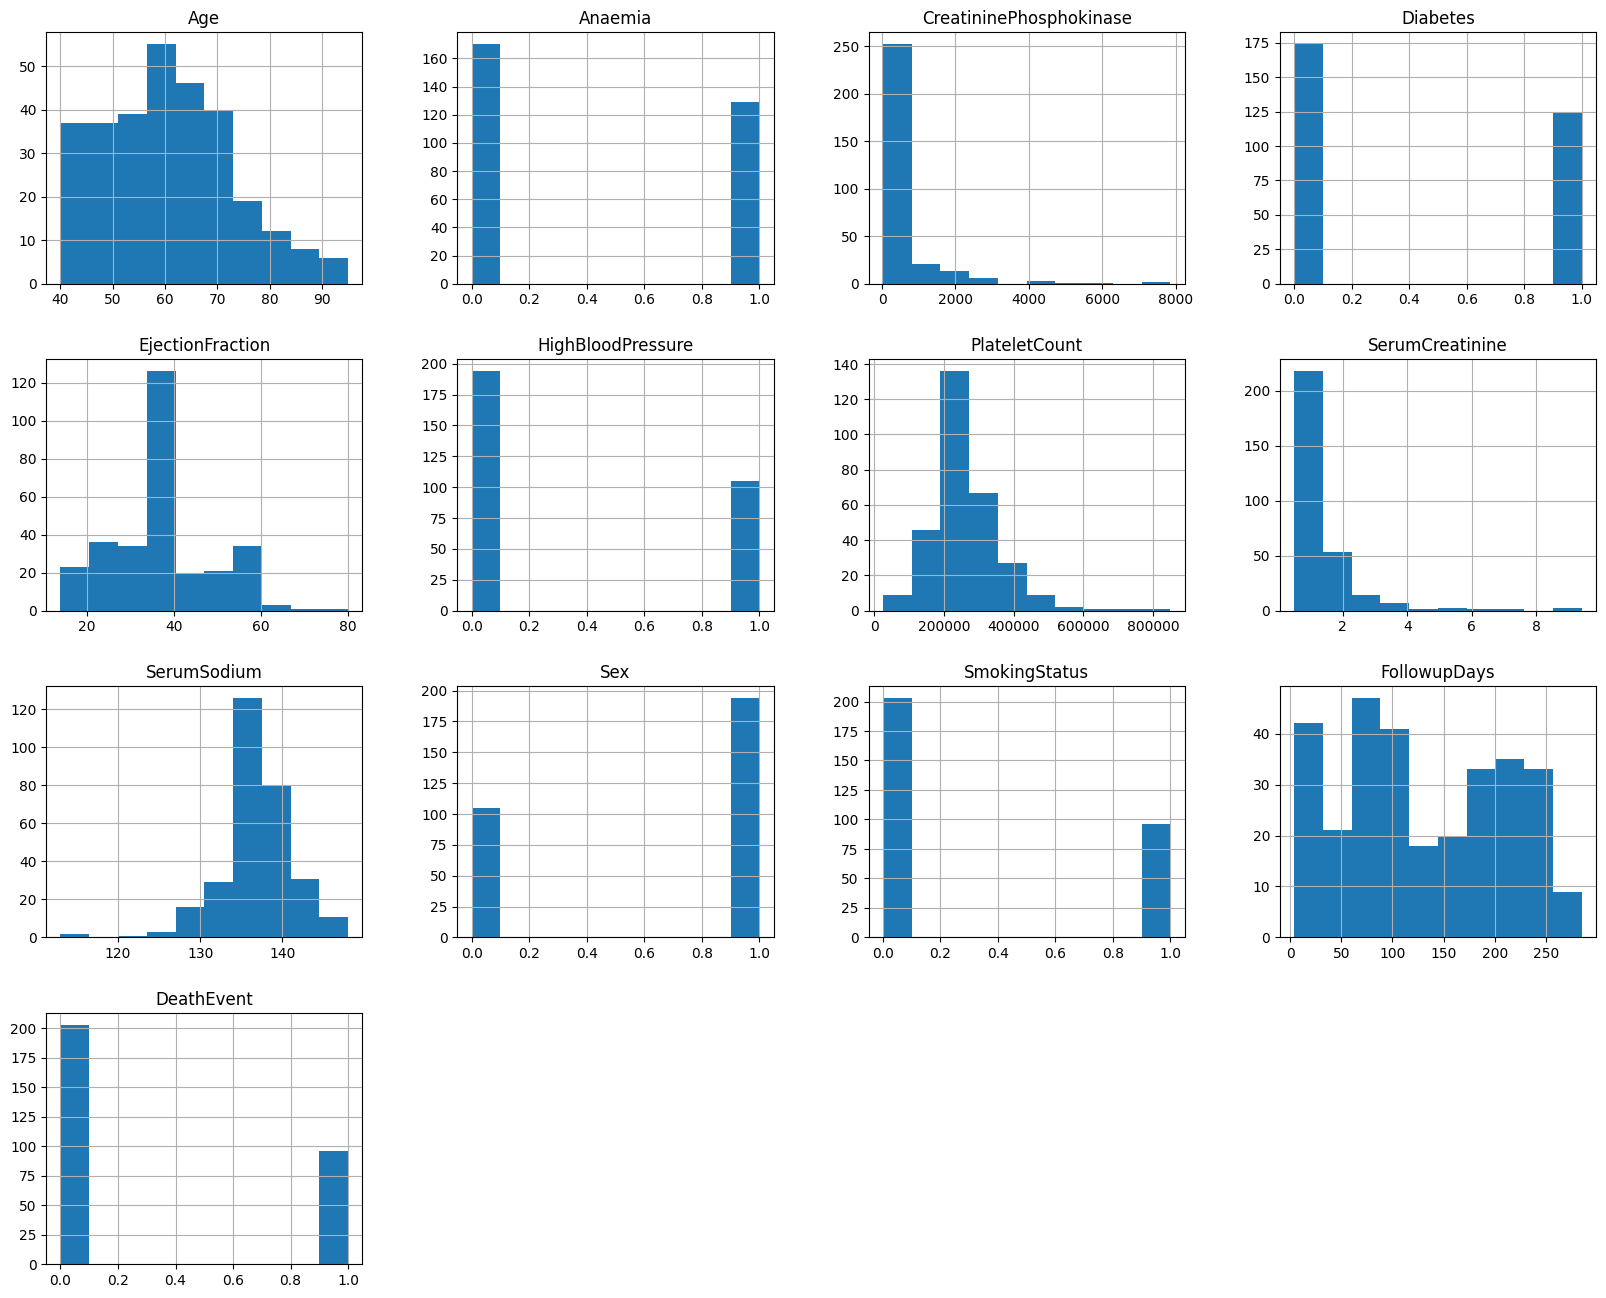

In [587]:
df.hist(figsize=(20, 16))

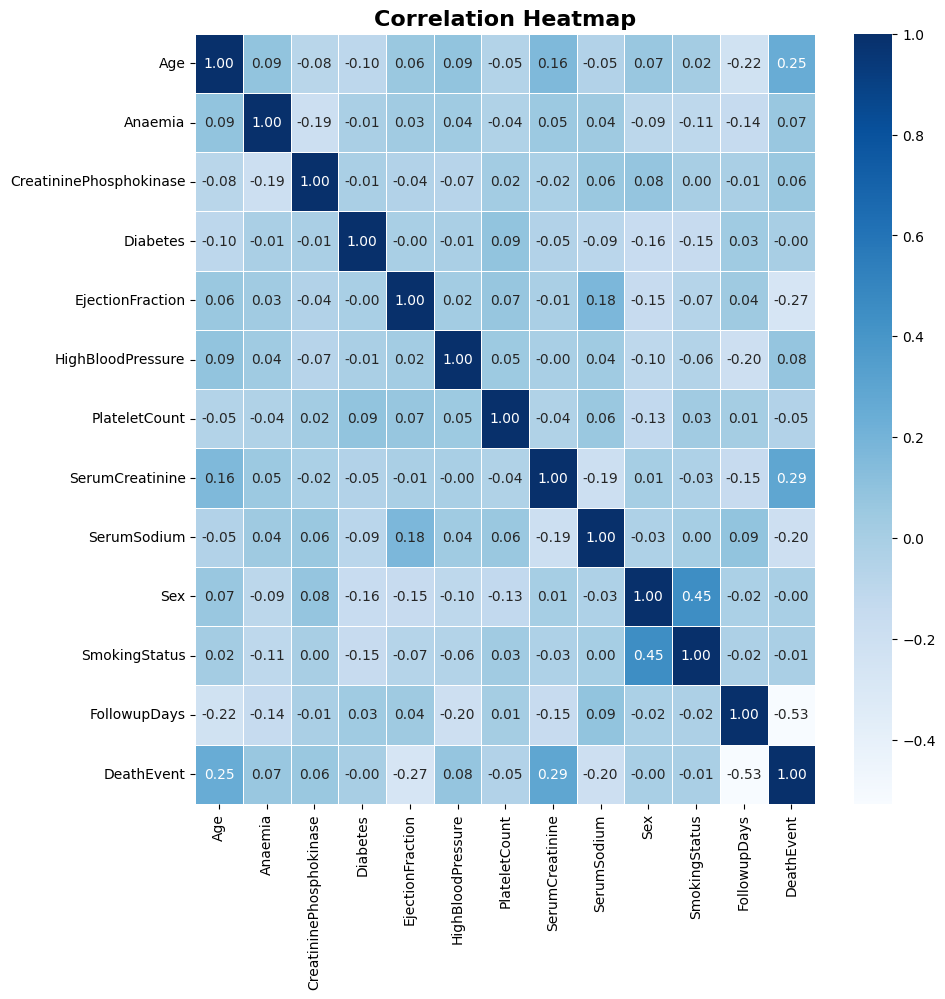

In [588]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,  annot=True, cmap='Blues', fmt='.2f', linewidths=0.5 ) 
plt.title('Correlation Heatmap', fontsize=16 , fontweight='bold')
plt.show()

# Imbalanced

In [589]:
df['DeathEvent'].value_counts()

DeathEvent
0    203
1     96
Name: count, dtype: int64

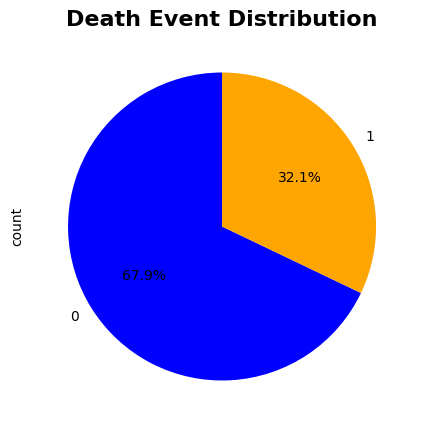

In [590]:
df['DeathEvent'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 5), colors=['blue', 'orange'])
plt.title('Death Event Distribution', fontsize=16, fontweight='bold')

plt.show()

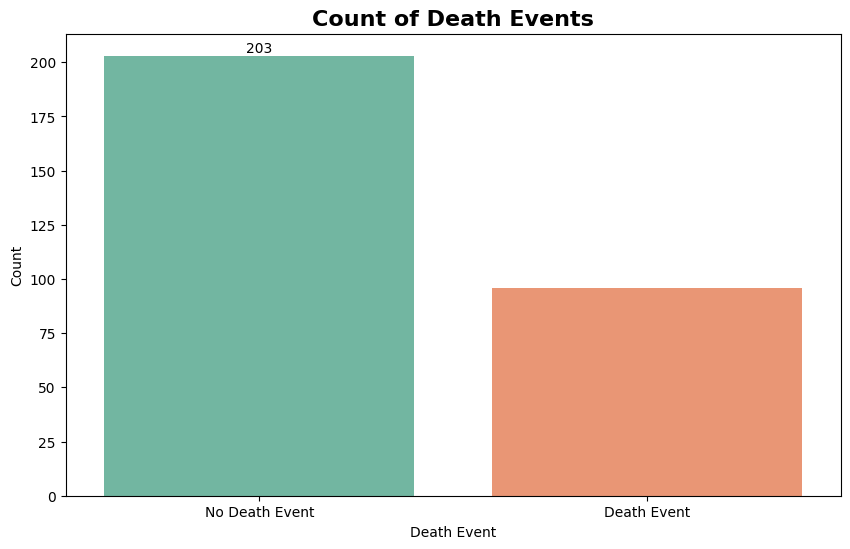

In [591]:
plt.figure(figsize=(10, 6))
ax =sns.countplot(x='DeathEvent', data=df, palette='Set2')
plt.title('Count of Death Events', fontsize=16, fontweight='bold')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
ax.bar_label(ax.containers[0])
plt.show()

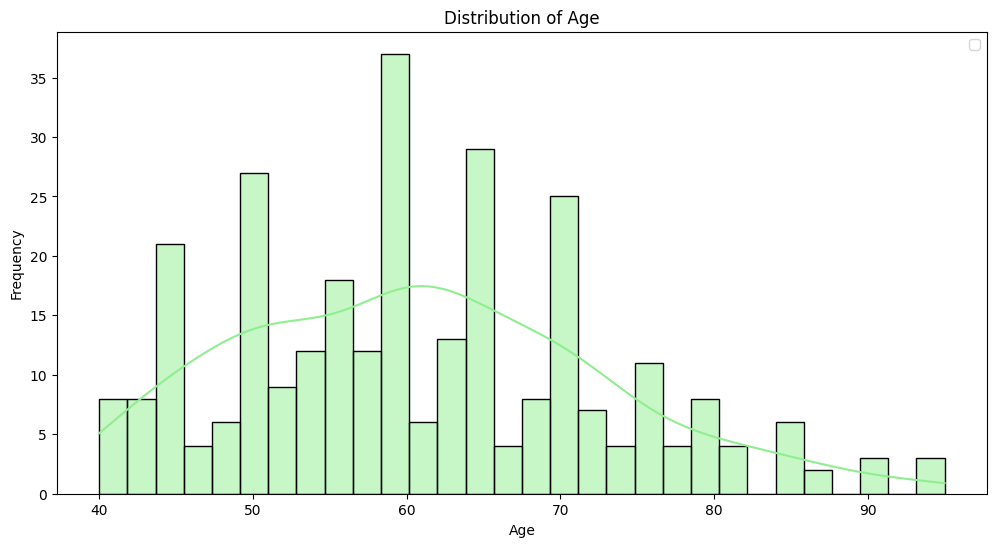

In [592]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.legend()
plt.show()

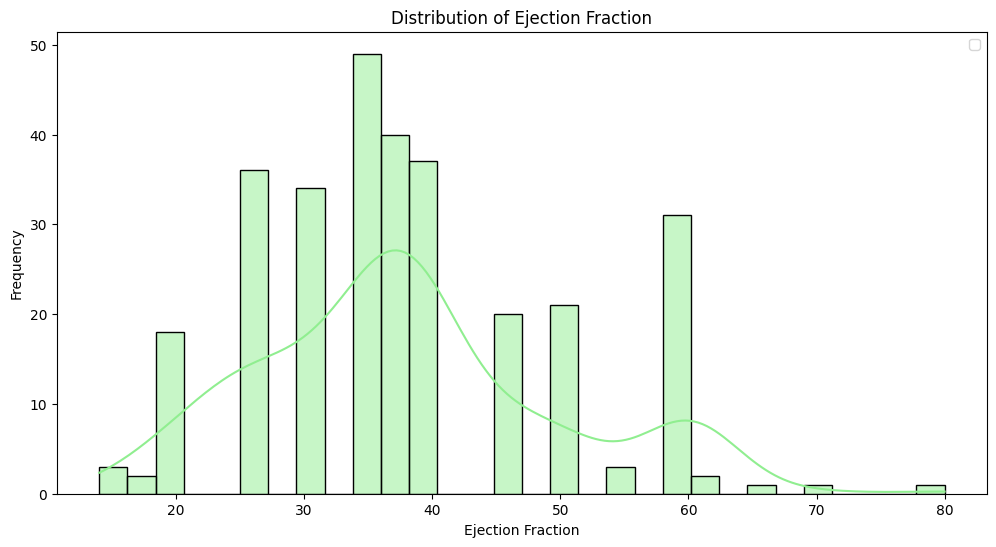

In [593]:
plt.figure(figsize=(12, 6))
sns.histplot(df['EjectionFraction'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Ejection Fraction')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [594]:
fig=px.histogram(df, 
                 x="DeathEvent",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group",
                 )

fig.show()

In [613]:
fig = px.box(df,y="Age",x="DeathEvent",title=f"Distrubution of Age")

fig.show()

In [596]:
x  = df.drop(columns=['DeathEvent'])
y = df['DeathEvent']

In [597]:
y.value_counts()

DeathEvent
0    203
1     96
Name: count, dtype: int64

# Splitting the data into training and testing sets


In [598]:
x_train, x_test, y_train, y_test = train_test_split(x , y,  stratify=y , random_state=42)

In [615]:
y_train.value_counts()

DeathEvent
0    152
1     72
Name: count, dtype: int64

In [599]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((224, 12), (75, 12), (224,), (75,))

# Modeling

In [600]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(probability=True), 
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False
    )
}

In [601]:
parameters = {
    'LogisticRegression': {
        'clf__C': np.logspace(-3, 3, 7),
        'clf__class_weight': ['balanced'],
        'clf__penalty': ['l2', 'l1'],
        'clf__solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],
        'clf__class_weight': ['rbf', 'balanced']
    },
    'DecisionTreeClassifier': {
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced'],
        'clf__criterion': ['gini', 'entropy']
    },
    'RandomForestClassifier': {
        'clf__n_estimators': [10, 20, 50, 100],
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced', 'balanced_subsample'],
        
    },
    'AdaBoostClassifier': {
        'clf__n_estimators': [50, 100, 150,200],
        'clf__learning_rate': [0.01, 0.1, 1],
        'clf__algorithm': ['SAMME', 'SAMME.R'],
        
    },
    'XGBClassifier': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__max_depth': [3, 5, 7],
        'clf__subsample': [0.8, 1.0],
        'clf__scale_pos_weight': [1, 2, 3]  
    },
    'KNeighborsClassifier': {
        'clf__n_neighbors': np.arange(1, 21),
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

In [610]:
y_train.value_counts()

DeathEvent
0    152
1     72
Name: count, dtype: int64

## Note 
### How it works:
n_jobs=1 → use only 1 CPU core (no parallelism — slowest).

n_jobs=4 → use exactly 4 CPU cores (parallel but limited).

n_jobs=-1 → use all CPU cores your machine has (fastest).



# Train

In [603]:
results = []

for name, model in models.items():
    
    print(f"Training {name}........")
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    param_grid = parameters.get(name, {})
    
    # Grid search
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    
    results.append({
        'name': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_  # store the fitted model
    })

# Sort by score (descending)
results_sorted = sorted(results, key=lambda x: x['best_score'], reverse=True)

top_5 = results_sorted[:5]



Training LogisticRegression........
Training KNeighborsClassifier........
Training SVC........
Training DecisionTreeClassifier........
Training RandomForestClassifier........
Training AdaBoostClassifier........
Training XGBClassifier........


# print leaderboard

In [609]:
print("\nLeaderboard:")

best_model = None
best_accuracy = -1
best_entry = None

for r in results_sorted:
    
    print(f"{r['name']}: {r['best_score']:.4f}, Params: {r['best_params']}")
    
    if r['best_score'] > best_accuracy:
        best_accuracy = r['best_score']
        best_model = r['model']
        best_entry = r

print("\nBest Model:")
print(f"Name: {best_entry['name']}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Params: {best_entry['best_params']}")



Leaderboard:
RandomForestClassifier: 0.8619, Params: {'clf__class_weight': None, 'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 50}
XGBClassifier: 0.8528, Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 50, 'clf__scale_pos_weight': 3, 'clf__subsample': 0.8}
AdaBoostClassifier: 0.8483, Params: {'clf__algorithm': 'SAMME', 'clf__learning_rate': 0.1, 'clf__n_estimators': 50}
DecisionTreeClassifier: 0.8397, Params: {'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10}
SVC: 0.8213, Params: {'clf__C': 100, 'clf__class_weight': 'balanced', 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
LogisticRegression: 0.8170, Params: {'clf__C': np.float64(0.001), 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
KNeighborsClassifier: 0.7458, Params: {'clf__algorithm': 'auto', 'clf__n_neighbors': np.int64(15), 'clf__weights': 'uniform'}

Be

In [608]:
for res in top_5:
    
    model_name = res['name']
    model = res['model']
    
    # Predictions
    y_pred = model.predict(x_test)
    
    # Scores
    acc = accuracy_score(y_test, y_pred)  
    recall_sco = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    classification_report_ = classification_report(y_test, y_pred)
    
    # Handle predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(x_test)
    else:
        y_scores = None
    
    if y_scores is not None:
        roc_auc = roc_auc_score(y_test, y_scores)
    else:
        roc_auc = float('nan')  # Not applicable
    
    # Print results
    print(f"=== ( {model_name} ) ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall_sco:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if y_scores is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: N/A (model does not support probability or decision function)")
    print("Classification Report:")
    print(classification_report_)
    print("#" * 100)
  

=== ( RandomForestClassifier ) ===
Accuracy: 0.8533
Recall: 0.6250
F1 Score: 0.7317
ROC AUC: 0.8824
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        51
           1       0.88      0.62      0.73        24

    accuracy                           0.85        75
   macro avg       0.86      0.79      0.82        75
weighted avg       0.86      0.85      0.85        75

####################################################################################################
=== ( XGBClassifier ) ===
Accuracy: 0.8267
Recall: 0.7083
F1 Score: 0.7234
ROC AUC: 0.8489
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.74      0.71      0.72        24

    accuracy                           0.83        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.82      0.83      0.83        75

########

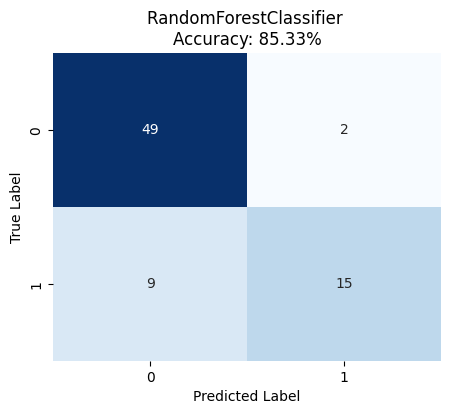

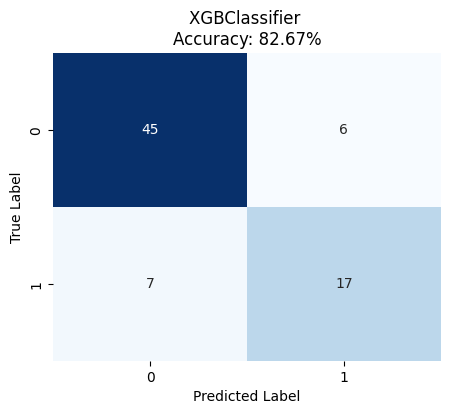

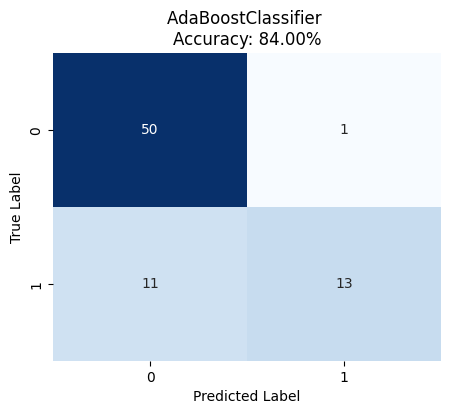

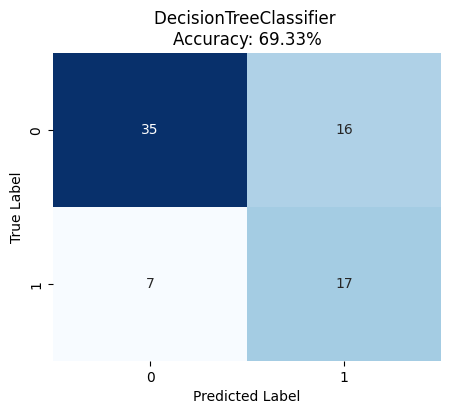

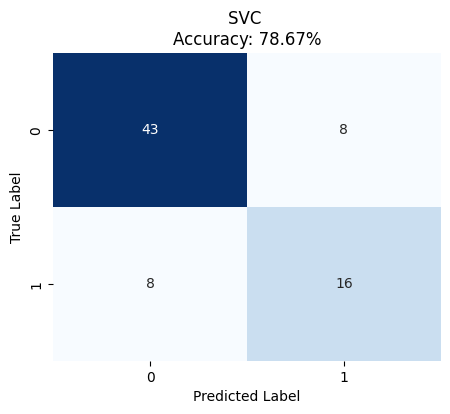

In [611]:

for res in top_5:
    
    model_name = res['name']
    model = res['model']

    # Predictions
    y_pred = model.predict(x_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)

    # --- Plot ---
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} \nAccuracy: {acc:.2%}")

    # # Save PNG
    # plt.tight_layout()
    # plt.savefig(f"confusion_matrix_{model_name}.png", dpi=300)
    # plt.show()  # show in notebook / console
    # plt.close()

# Shap XAI

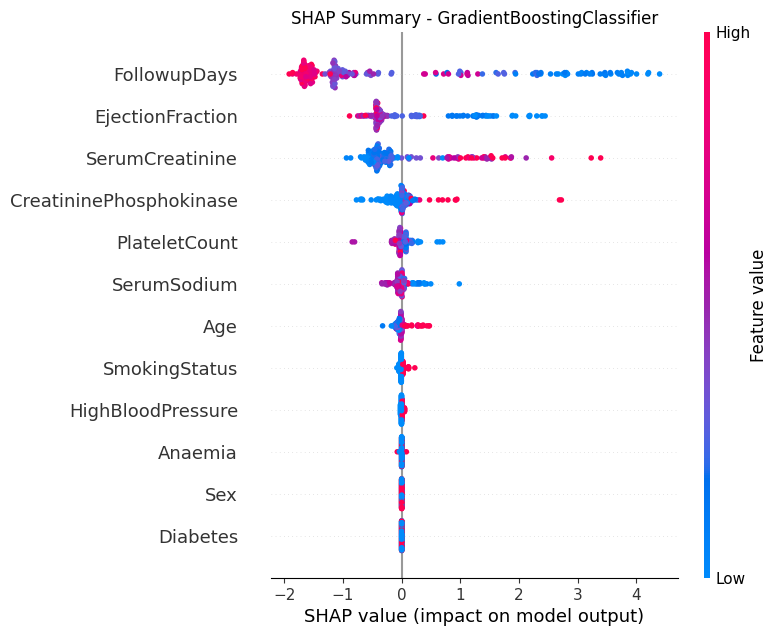

# Save top 5 models


In [607]:
# for i, res in enumerate(results_sorted[:6], start=1):
#     filename = f"top_{i}_{res['name']}.joblib"
#     joblib.dump(res['model'], filename)
#     print(f"Saved: {filename} (Score: {res['best_score']:.4f})")